# The Spark Foundation

## Data Science and Bussiness Analytics

## Name : SHYAMDINESH M V M

Task1 : Predict the percentage of a student based on number of study hours

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
link="http://bit.ly/w-data"
mydata=pd.read_csv(link)
mydata.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Dataset Information and Checking for Null Values

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
mydata.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing the Dataset

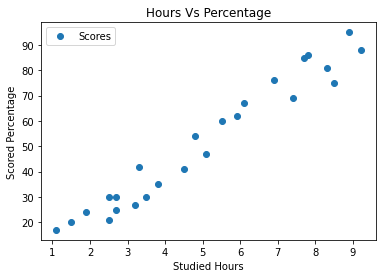

In [5]:
#Plotting the values in the form of graph
mydata.plot(x='Hours',y='Scores',style='o')
plt.title("Hours Vs Percentage")
plt.xlabel('Studied Hours')
plt.ylabel('Scored Percentage')
plt.show()

From the above graph we can see that scored percentage increases when hours of study increases respectively

# Splitting x and y variables

In [6]:
y = mydata.Scores
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [7]:
x = mydata.drop("Scores",axis=1)
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


# Performing Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.8,random_state=2)

# Building the Model

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Prediction

In [10]:
y_pred=model.predict(x_test)
y_pred

array([29.82930731, 84.86018237, 27.93169093, 46.90785474, 40.26619741,
       37.41977284, 77.26971685, 18.44360902, 74.42329227, 52.60070389,
       34.57334826, 56.39593665, 49.75427932, 29.82930731, 62.08878579,
       60.19116941, 78.21852504, 35.52215645, 88.65541513, 82.96256599])

In [11]:
model.score(x_test,y_test)

0.9401386397064545

# Comparison between Actual and Predicted

In [12]:
df= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
9,25,29.829307
3,75,84.860182
16,30,27.931691
12,41,46.907855
22,35,40.266197
4,30,37.419773
10,85,77.269717
5,20,18.443609
19,69,74.423292
1,47,52.600704


In [13]:
f_com= pd.DataFrame({'Actual': y_test,'Machine_Predicted': y_pred})
f_com

,Actual,Machine_Predicted
9,25,29.829307
3,75,84.860182
16,30,27.931691
12,41,46.907855
22,35,40.266197
4,30,37.419773
10,85,77.269717
5,20,18.443609
19,69,74.423292
1,47,52.600704


# Residual

In [14]:
res=y_pred-y_test
res

9     4.829307
3     9.860182
16   -2.068309
12    5.907855
22    5.266197
4     7.419773
10   -7.730283
5    -1.556391
19    5.423292
1     5.600704
2     7.573348
7    -3.604063
21   -4.245721
20   -0.170693
18   -4.911214
11   -1.808831
24   -7.781475
13   -6.477844
15   -6.344585
8     1.962566
Name: Scores, dtype: float64

# Prediction

In [15]:
hours = 0.25
hours=np.reshape(hours,(1,-1))
own_pred=model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[0.25]]
Predicted Score = 6.583506638937775


In [16]:
from sklearn.metrics import mean_squared_error as ms

In [17]:
mean_sqr = ms(y_test,y_pred)
mean_sqr

31.39414075254919

In [18]:
root_mean_sqr = np.sqrt(mean_sqr)
root_mean_sqr

5.603047452284265

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 5.02713165893457
